In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
PATH_20 = "data/rezultati_2020/Excel/" #+ "02_01.xlsx"
PATH_16 = "data/rezultati_2016/Excel/" #+ "001_00.xlsx"
PATH_15 = "data/rezultati_2015/Excel/" #+ "02_01.xlsx"
PATH_11 = "data/rezultati_2011/Excel/" #+ "01_I_izborna_jedinica.xlsx"

In [3]:
def get_data_ii(i):
    if i < 10:
        i = "0" + str(i)
    data_20 = pd.DataFrame(pd.read_excel(PATH_20 + "02_"+str(i)+".xlsx")) 
    data_16 = pd.DataFrame(pd.read_excel(PATH_16 + "/0"+str(i)+"_00.xlsx"))
    data_15 = pd.DataFrame(pd.read_excel(PATH_15 + "02_"+str(i)+".xlsx"))
    #data_11 = pd.DataFrame(pd.read_excel(PATH_11 + ""+str(i)+"_izborna_jedinica.xlsx"))
    return data_20, data_16, data_15

In [4]:
def get_all_data():
    dataframes_20 = []
    dataframes_16 = []
    dataframes_15 = []
    #dataframes_11 = []

    for i in tqdm(range (1,11)):
        data_20, data_16, data_15 = get_data_ii(i)
        #remove first row and last 3 rows
        #data_11 = data_11.iloc[1:-3]

        data_20 = data_20.filter(regex="Rbr BM|Naziv BM|Adresa BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST|DOMOVINSKI POKRET|MOŽEMO", axis=1)
        data_16 = data_16.filter(regex="Rbr BM|Naziv BM|Adresa BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
        data_15 = data_15.filter(regex="Rbr BM|Naziv BM|Adresa BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
        #data_11 = data_11.filter(regex="BM Rbr|BM Naziv|BM Adresa|Glasovalo ukupno|SDP|HDZ", axis=1)

        data_20.columns = ["Rbr BM", "Naziv BM", "Adresa BM","Glasovalo ukupno","MOST", "MOŽEMO", "DP", "HDZ", "SDP"]
        data_16.columns = ["Rbr BM", "Naziv BM", "Adresa BM" ,"Glasovalo ukupno","MOST", "HDZ", "SDP"]
        data_15.columns = ["Rbr BM", "Naziv BM", "Adresa BM" ,"Glasovalo ukupno","HDZ", "MOST", "SDP"]
        #data_11.columns = ["Rbr BM", "Naziv BM", "Adresa BM" ,"Glasovalo ukupno","HDZ", "SDP"]

        for df in [data_20, data_16, data_15]:
            df["Adresa BM"] = df["Adresa BM"] + " " + df["Naziv BM"]
            df["BM"] = df["Rbr BM"].astype(int).astype(str) + " " + df["Naziv BM"]
            df.drop("Naziv BM", axis=1, inplace=True)
            df.drop("Rbr BM", axis=1, inplace=True)


        dataframes_20.append(data_20)
        dataframes_16.append(data_16)
        dataframes_15.append(data_15)
        #dataframes_11.append(data_11)

    data_20 = pd.concat(dataframes_20)
    data_16 = pd.concat(dataframes_16)
    data_15 = pd.concat(dataframes_15)
    #data_11 = pd.concat(dataframes_11)
    return data_20, data_16, data_15

        

<>:12: SyntaxWarning: invalid escape sequence '\('
<>:13: SyntaxWarning: invalid escape sequence '\('
<>:14: SyntaxWarning: invalid escape sequence '\('
<>:12: SyntaxWarning: invalid escape sequence '\('
<>:13: SyntaxWarning: invalid escape sequence '\('
<>:14: SyntaxWarning: invalid escape sequence '\('
C:\Users\Ana\AppData\Local\Temp\ipykernel_5124\2203313634.py:12: SyntaxWarning: invalid escape sequence '\('
  data_20 = data_20.filter(regex="Rbr BM|Naziv BM|Adresa BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST|DOMOVINSKI POKRET|MOŽEMO", axis=1)
C:\Users\Ana\AppData\Local\Temp\ipykernel_5124\2203313634.py:13: SyntaxWarning: invalid escape sequence '\('
  data_16 = data_16.filter(regex="Rbr BM|Naziv BM|Adresa BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|MOST", axis=1)
C:\Users\Ana\AppData\Local\Temp\ipykernel_5124\2203313634.py:14: SyntaxWarning: invalid escape sequence '\('
  data_15 = data_15.filter(regex="Rbr BM|Naziv BM|Adresa BM|^Glasovalo birača \(po listićima\)$|SDP|HDZ|

In [5]:
data_20, data_16, data_15 = get_all_data()

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [01:02<00:00,  6.21s/it]


In [6]:
data_20

,Adresa BM,Glasovalo ukupno,MOST,MOŽEMO,DP,HDZ,SDP,BM
0,MEDULIĆEVA ULICA 36 ANDRIJA MEDULIĆ,542,31,143,52,199,77,1 ANDRIJA MEDULIĆ
1,MEDULIĆEVA ULICA 30 ANDRIJA MEDULIĆ,540,39,152,56,124,116,2 ANDRIJA MEDULIĆ
2,ULICA PAVLA HATZA 8 AUGUST ŠENOA,570,55,150,42,138,130,3 AUGUST ŠENOA
3,ULICA PAVLA HATZA 8 AUGUST ŠENOA,610,39,154,59,156,139,4 AUGUST ŠENOA
4,GUNDULIĆEVA ULICA 23A CVJETNI TRG,513,34,162,18,126,125,5 CVJETNI TRG
...,...,...,...,...,...,...,...,...
636,DR. ANTE STARČEVIĆA 84 PETRAČA,693,91,26,95,341,81,3 PETRAČA
637,PUT DR. ANTE STARČEVIĆA 98 ČIBAČA,754,96,24,73,414,95,4 ČIBAČA
638,VUKOVARSKA 48 SREBRENO,736,103,49,83,329,110,5 SREBRENO
639,PLAT 47 PLAT,283,33,20,32,133,40,6 PLAT


Text(0.5, 1.0, 'Distribution of number of votes per BM in 2015, 2016 and 2020')

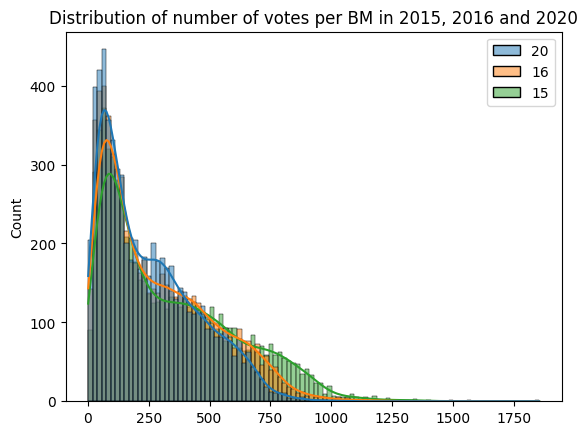

In [7]:
all_data = {"20": data_20["Glasovalo ukupno"].values,"16":data_16["Glasovalo ukupno"].values,"15":data_15["Glasovalo ukupno"].values}
sns.histplot(all_data, kde=True, bins=100)
plt.title("Distribution of number of votes per BM in 2015, 2016 and 2020")

In [8]:
#calculate variance of each row across all dataframes
def calculate_variance(dataframes, column_names):
    variance_dict = {}
    big_dict = {}

    #iterate for each stranka
    for stranka in column_names:
        variance_dict[stranka] = {}
        big_dict[stranka] = {}
        
        #iterate over all rows aka biracka mjesta
        for i in tqdm(range(len(dataframes[0]))):
            row_votes = []
            row_percentages = []
            big_dict_votes = []

            #iterate for each year
            for j in range(len(dataframes)):
                #we use the same bm for all dataframes and use 2020 as reference
                bm = dataframes[0]["BM"].iloc[i]
                #some biracka mjesta are missing in some years
                try:
                    #for that year dataframe[j] we find the same bm as the reference
                    entry_of_interest = dataframes[j].loc[dataframes[j]['BM'] == bm]

                    #absolute number of votes for that stranka
                    votes = int(entry_of_interest[stranka].values[0])
                    #calculate percentage of votes for that stranka
                    value = (votes / int(entry_of_interest["Glasovalo ukupno"].values[0]))*100

                    row_votes.append(votes)
                    row_percentages.append(value)
                    big_dict_votes.append(str(votes) + "/" + str(entry_of_interest["Glasovalo ukupno"].values[0]))
                except:
                    pass
            
            #if the bm was present for all years
            if len(row_percentages) == len(dataframes):
            #if we decide to include 2011
            #if len(row_percentages) == len(dataframes) or (stranka=="MOST" and len(row_percentages) == len(dataframes)-1): 
                 
                #find max difference between elements in row
                diff = max(row_votes) - min(row_votes)
                #find max difference in percentages
                diff_percent = max(row_percentages) - min(row_percentages)

                #meadian of percentages
                median = np.median(row_percentages)

                #if all row_votes 0, we skip
                if row_votes == [0,0,0]:
                    # print(stranka, dataframes[0]["BM"].iloc[i], big_dict_votes)
                    continue
                
                variance_dict[stranka][dataframes[0]["BM"].iloc[i]] = [diff, diff_percent, np.var(row_percentages), np.std(row_percentages), median]
                big_dict[stranka][dataframes[0]["BM"].iloc[i]] = big_dict_votes


    return big_dict, variance_dict

In [9]:
column_names = ["HDZ", "SDP", "MOST"]
dataframes = [data_20, data_16, data_15]
big_dict, variance_dict = calculate_variance(dataframes, column_names)    

  0%|          | 0/6558 [00:00<?, ?it/s]

100%|██████████| 6558/6558 [00:21<00:00, 301.87it/s]


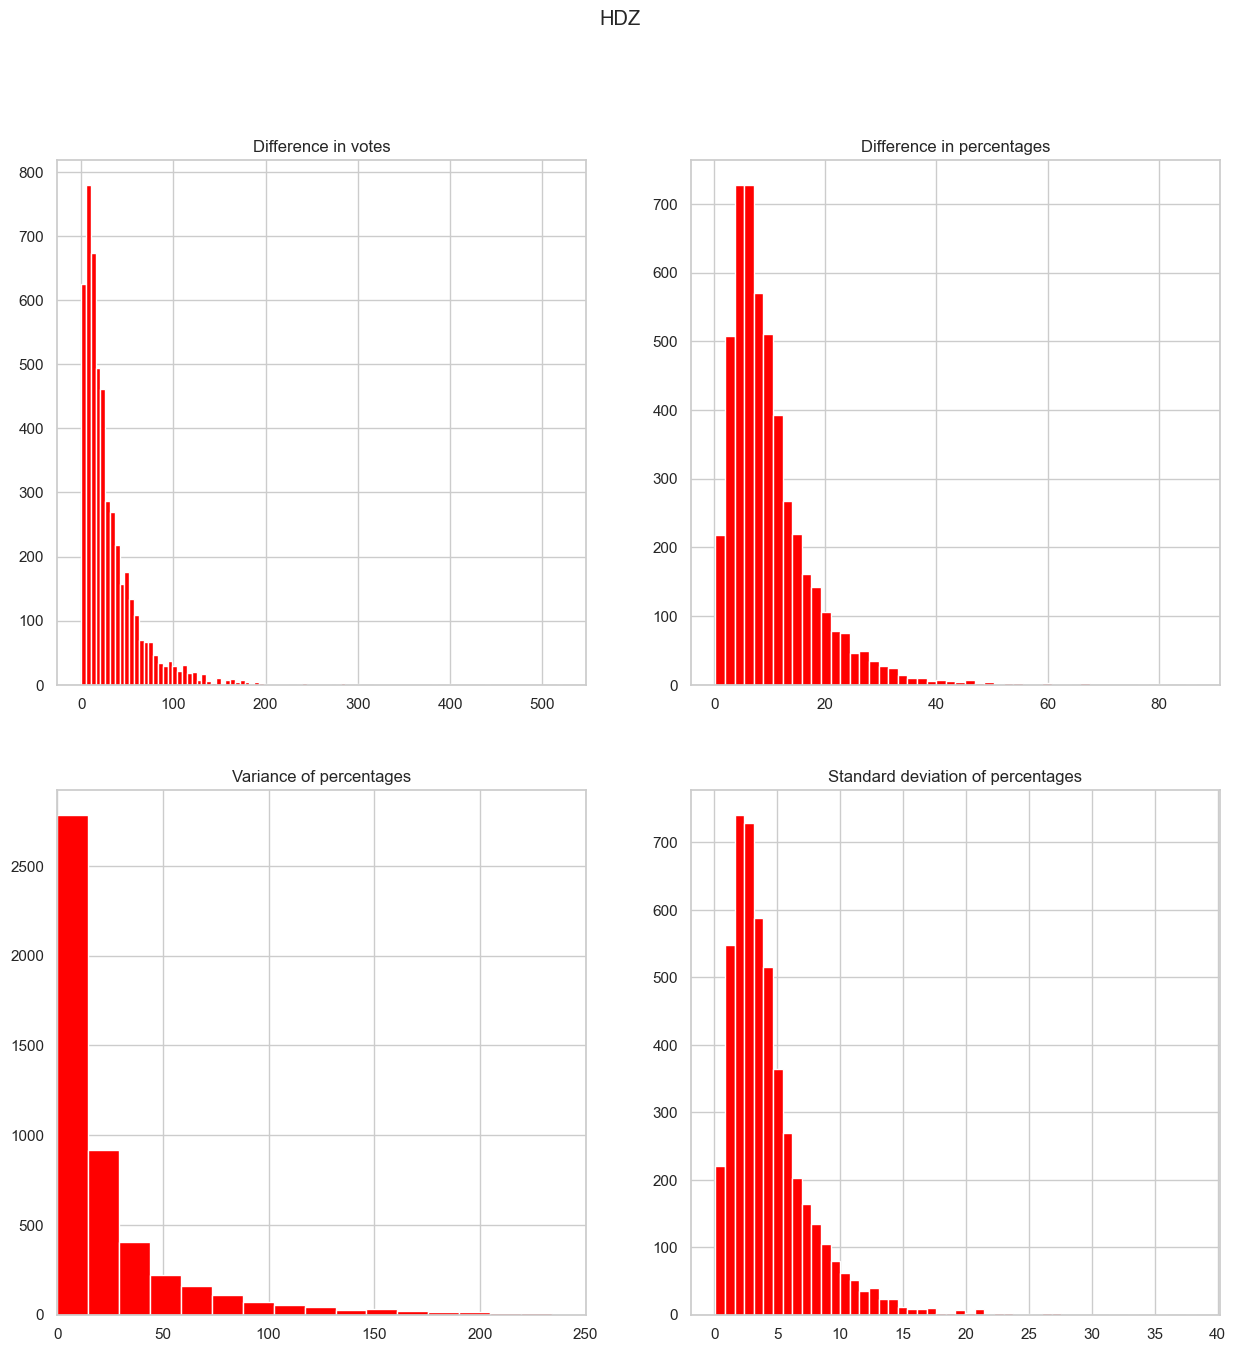

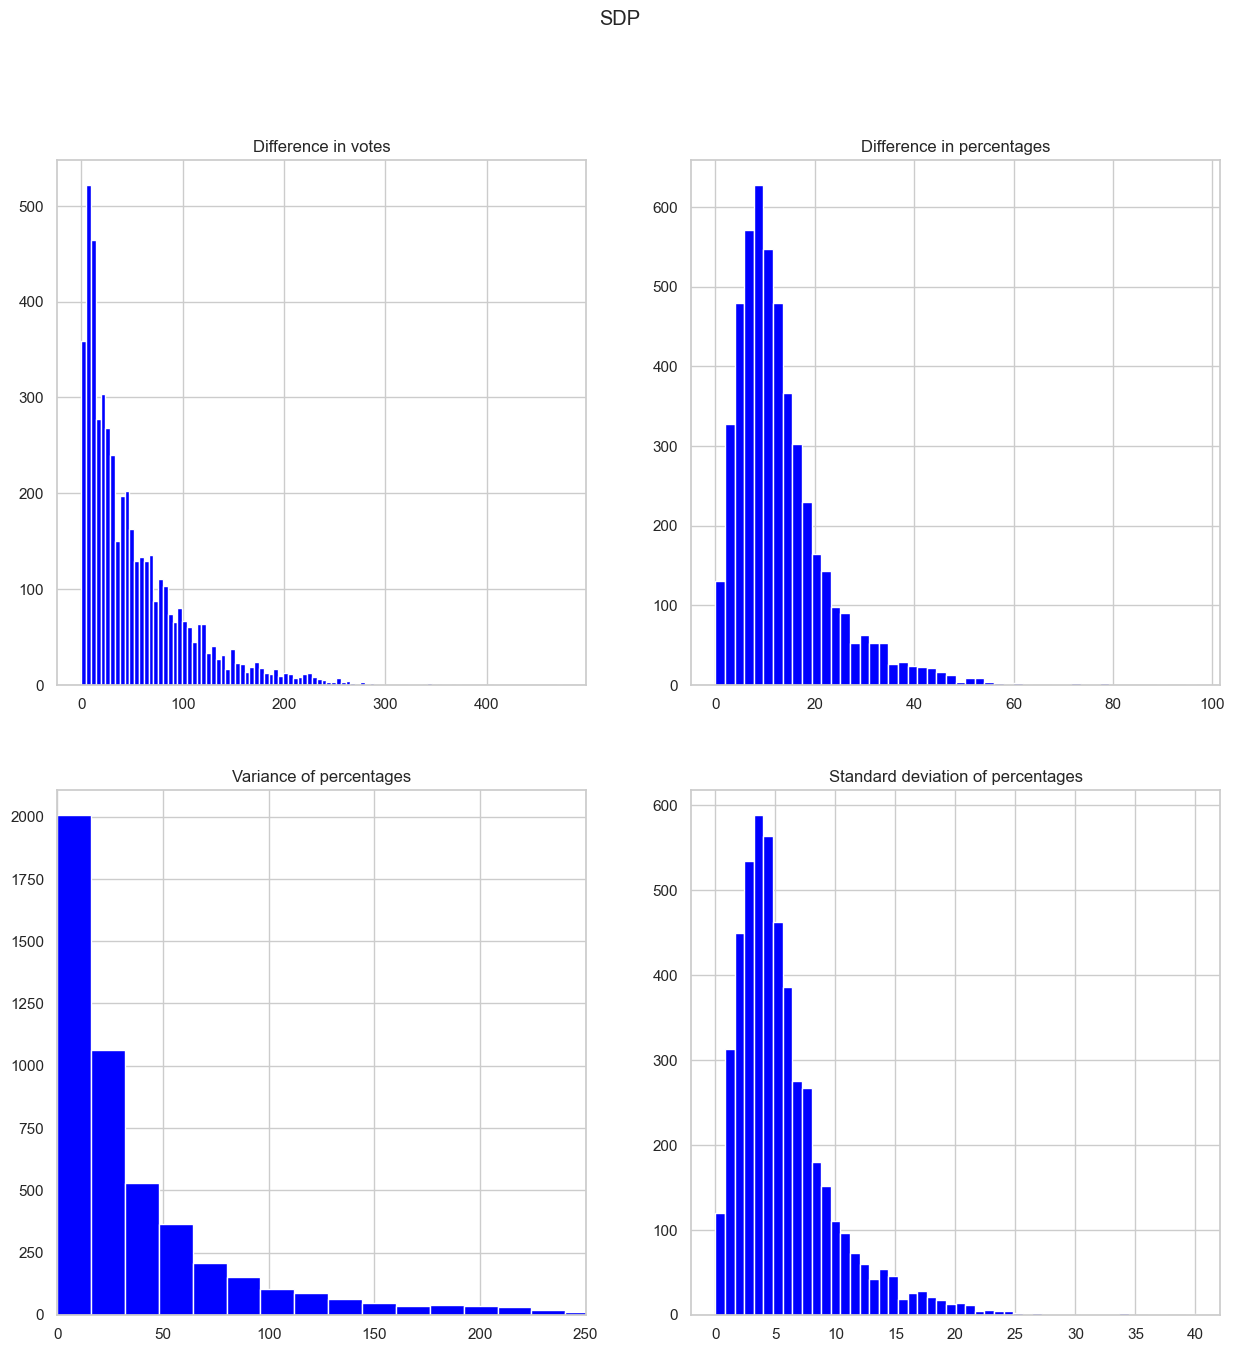

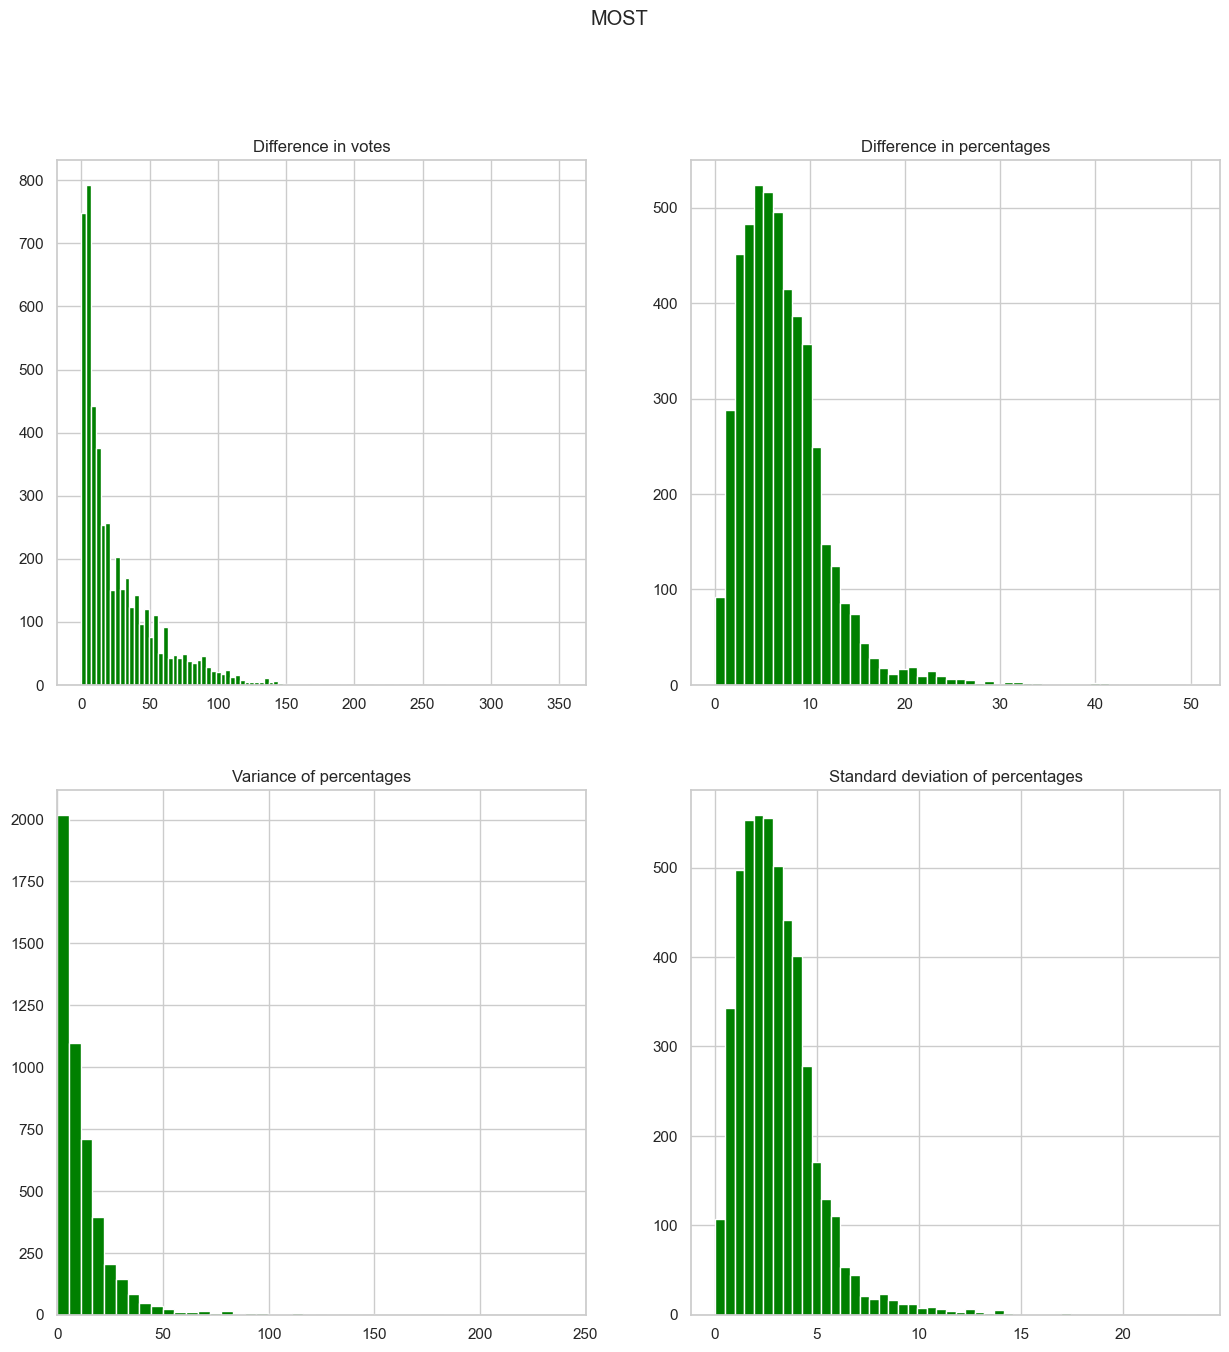

In [10]:
sns.set(style="whitegrid")

colors= {"HDZ": "red", "SDP": "blue", "MOST": "green"}
def plot_hist(big_dict, variance_dict, stranka):
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.suptitle(stranka)
    axs[0, 0].hist([x[0] for x in variance_dict[stranka].values()], bins=100, color= colors[stranka])
    axs[0, 0].set_title("Difference in votes")
    axs[0, 1].hist([x[1] for x in variance_dict[stranka].values()], bins=50, color= colors[stranka])
    axs[0, 1].set_title("Difference in percentages")
    axs[1, 0].set_xlim(0, 250)
    axs[1, 0].hist([x[2] for x in variance_dict[stranka].values()], bins=100, color= colors[stranka])
    axs[1, 0].set_title("Variance of percentages")
    axs[1, 1].hist([x[3] for x in variance_dict[stranka].values()], bins=50, color= colors[stranka])
    axs[1, 1].set_title("Standard deviation of percentages")
    plt.show()

for stranka in column_names:
    plot_hist(big_dict, variance_dict, stranka)
    

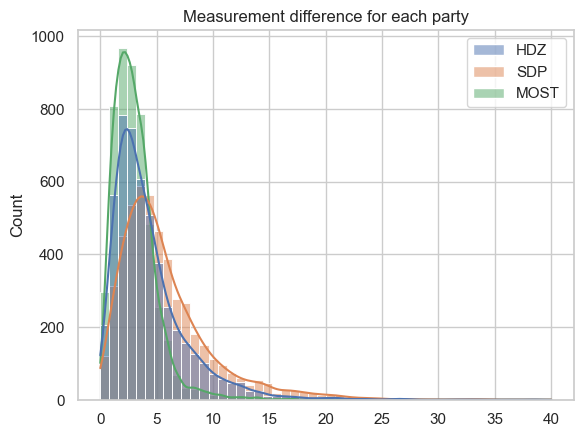

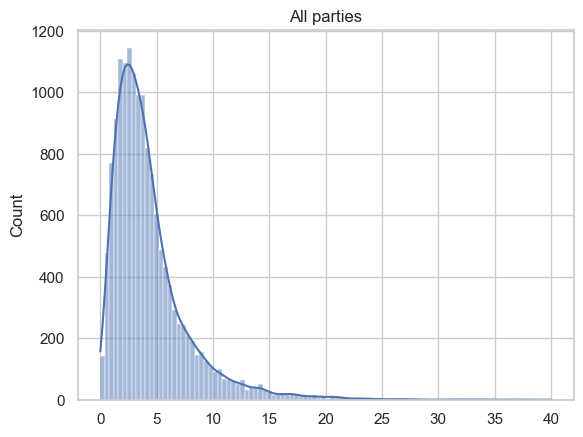

In [11]:
#visualize the distribution of variance
def plot_variance(variance_dict, column_names):
    new_values = {}
    for stranka in column_names:
        values = list(variance_dict[stranka].values())
        new_values[stranka] = [value[3] for value in values]
        
    sns.histplot(new_values, kde=True, bins=50, color=colors.get(stranka, 'black'), label=stranka)
    plt.title("Measurement difference for each party")
    plt.show()

    sns.histplot([item for sublist in new_values.values() for item in sublist], kde=True, bins=100)
    plt.title("All parties")
    plt.show()

plot_variance(variance_dict, column_names)



-------

### Biračka mjesta koja imaju minimalne promjene kroz godine za:
- value_type = 0: razlika u apsolutnoj vrijednosti u broju glasova
- value_type = 1: razlika u postotku glasova
- value_type = 2: varijanca postotka glasova
- value_type = 3: standardna devijacija postotka glasova

In [12]:
def get_least_volatile(variance_dict, big_dict, threshold_value = 25.0, value_type=1):

    # Sort items in variance_dict based on the fourth element in the tuple
    items_variance = list(variance_dict.items())
    items_variance.sort(key=lambda x: x[1][value_type])

    print("Least volatile:")
    bms = []
    medians = []
    for value in items_variance:
        # kroz godine promjena manja od 2%
        if value[1][value_type] < 5 and value[1][4] > threshold_value:
            print(f"{value[0]}: Measure value = {value[1][value_type]}, Votes over years: {big_dict[value[0]]}, Median: {value[1][4]}")
            bms.append(value[0])
            medians.append(value[1][4])
    
    print("\nBroj BM koji imaju male promjene: "+ str(len(bms)))
    return bms, medians

In [51]:
print("HDZ")
bms_hdz, medians_hdz =get_least_volatile(variance_dict["HDZ"], big_dict["HDZ"], 25, 1)

HDZ
Least volatile:
7 VINKOVCI: Measure value = 0.17595720720720465, Votes over years: ['95/222', '110/256', '135/315'], Median: 42.857142857142854
4 DOLIĆA DRAGA: Measure value = 0.24424105306458443, Votes over years: ['138/176', '147/187', '163/208'], Median: 78.4090909090909
1 CERNA: Measure value = 0.26235846451257316, Votes over years: ['191/426', '213/474', '276/612'], Median: 44.936708860759495
2 NARTA: Measure value = 0.26933004152171236, Votes over years: ['48/134', '48/133', '58/161'], Median: 36.024844720496894
3 DAUTAN: Measure value = 0.3065134099616813, Votes over years: ['47/106', '52/117', '64/145'], Median: 44.339622641509436
3 KRIŽOVLJAN: Measure value = 0.3296703296703285, Votes over years: ['23/65', '35/98', '45/126'], Median: 35.714285714285715
11 VINKOVCI: Measure value = 0.3367402032755251, Votes over years: ['173/386', '204/453', '247/547'], Median: 45.033112582781456
7 SUTOMIŠĆICA: Measure value = 0.3717309542552272, Votes over years: ['75/206', '87/240', '80/2

In [52]:
print("SDP")
bms_sdp, medians_sdp =get_least_volatile(variance_dict["SDP"], big_dict["SDP"],25, 1)

SDP
Least volatile:
33 SISAK: Measure value = 0.13351393188855099, Votes over years: ['38/85', '211/472', '271/608'], Median: 44.70338983050847
9 PETRINJA: Measure value = 0.30913738778907884, Votes over years: ['100/308', '122/378', '145/445'], Median: 32.467532467532465
6 PLOČE: Measure value = 0.42240466101694807, Votes over years: ['174/512', '203/590', '231/676'], Median: 34.171597633136095
8 JURDANI: Measure value = 0.4577508350859887, Votes over years: ['104/236', '122/274', '141/319'], Median: 44.20062695924764
4 MATULJI: Measure value = 0.5617028840599048, Votes over years: ['158/390', '197/480', '237/577'], Median: 41.041666666666664
2 DONJA DUBRAVA: Measure value = 0.5785388530362923, Votes over years: ['187/409', '227/494', '244/527'], Median: 45.95141700404859
9 LEDINA: Measure value = 0.6418918918918948, Votes over years: ['22/53', '31/74', '33/80'], Median: 41.509433962264154
2 SRESER: Measure value = 0.6499327655759792, Votes over years: ['27/84', '31/97', '30/92'], Med

In [53]:
print("MOST")
bms_most, medians_most =get_least_volatile(variance_dict["MOST"], big_dict["MOST"],25, 1)

MOST
Least volatile:
5 BIRAČKO MJESTO 5. U SINJU: Measure value = 3.1994651904154168, Votes over years: ['229/883', '295/1071', '288/1183'], Median: 25.934314835787088
18 SVINIŠĆE: Measure value = 3.2051282051282044, Votes over years: ['15/60', '19/75', '22/78'], Median: 25.333333333333336
1 METKOVIĆ: Measure value = 4.077134986225893, Votes over years: ['104/363', '121/380', '144/440'], Median: 31.842105263157894
1 BIRAČKO MJESTO 1. U SINJU: Measure value = 4.904979190693474, Votes over years: ['93/407', '136/490', '132/520'], Median: 25.384615384615383

Broj BM koji imaju male promjene: 4


In [55]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapiExercises")

cleaned_names = {}
medians = {}
cleaned_names["HDZ"]=[re.sub(r'\s+\d+$', '', name) for name in bms_hdz]
medians["HDZ"] = medians_hdz
cleaned_names["SDP"] = [re.sub(r'\s+\d+$', '', name) for name in bms_sdp]
medians["SDP"] = medians_sdp
cleaned_names["MOST"] = [re.sub(r'\s+\d+$', '', name) for name in bms_most]
medians["MOST"] = medians_most

# This will hold the place names and their coordinates
places_with_coordinates = []

for stranka in ["HDZ", "SDP", "MOST"]:
    for place, median in tqdm(zip(cleaned_names[stranka], medians[stranka])):
        try:
            location = geolocator.geocode(place + ", Croatia")
            if location:
                places_with_coordinates.append((place, location.latitude, location.longitude, stranka, median))
            time.sleep(0.5)  # To avoid hitting rate limits
        except Exception as e:
            print(f"Error occurred for {place}: {e}")

# Now, we can plot these on a map
# map = folium.Map(location=[44.28 , 16.26], zoom_start=7)

# for name, lat, lon, stranka, median in places_with_coordinates:
#     folium.Marker(location=[lat, lon], popup=str(name+": "+ str(median)), icon=folium.Icon(color=colors[stranka])).add_to(map)

# map


1it [00:03,  3.17s/it]

Error occurred for 7 VINKOVCI: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=7+VINKOVCI%2C+Croatia&format=json&limit=1 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000287A098E6C0>: Failed to establish a new connection: [WinError 10051] A socket operation was attempted to an unreachable network'))


17it [00:19,  1.50s/it]

Error occurred for 1 REKA: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=1+REKA%2C+Croatia&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


881it [10:48,  1.36it/s]
275it [03:24,  1.35it/s]
4it [00:02,  1.46it/s]


In [56]:
from ipyleaflet import Map, Marker, Popup, WidgetControl, Icon
from ipywidgets import HTML, IntSlider, jslink
import time
import re
from tqdm import tqdm 
from ipywidgets import Layout

In [58]:
color_mapping = {
    "HDZ": "http://maps.google.com/mapfiles/ms/icons/blue-dot.png",
    "SDP": "http://maps.google.com/mapfiles/ms/icons/red-dot.png",
    # Add more groups and their URLs as needed
}
# Create the map
m = Map(center=(44.28, 16.26), zoom=7, layout=Layout(width='1050px', height='600px'))

# Create markers and add them to a MarkerCluster
markers = []
for name, lat, lon, stranka, median in places_with_coordinates:
    message = HTML()
    message.value = f"Name: {name}<br>Median: {median}"

                # Set the icon color based on the group
    icon_url = color_mapping.get(stranka, "http://maps.google.com/mapfiles/ms/icons/green-dot.png")  # Default to green if not found
    icon = Icon(icon_url=icon_url, icon_size=[32, 32], icon_anchor=[16, 32])

                # Create marker with the custom icon
    marker = Marker(location=(lat, lon), icon=icon)
    popup =  Popup(location=marker.location, child=message, close_button=False, auto_close=False, close_on_escape_key=False)
    marker.popup = popup
    markers.append((marker, median, popup))
    m.add_layer(marker)

# Slider
slider = IntSlider(description='Median Value', min=min([median for _, median, _ in markers]), max=max([median for _, median, _  in markers]), continuous_update=False)

# Link slider to markers
def update_markers(change):
    new_median = change['new']
    for marker, median, original_popup in markers:
        if median >= new_median:
            marker.visible = True
            if marker.popup is None:
                marker.popup = original_popup
        else:
            marker.visible = False
            # Remove the popup
            marker.popup = None

slider.observe(update_markers, 'value')

# Add slider to the map
widget_control = WidgetControl(widget=slider, position='topright')
m.add_control(widget_control)

m


Map(center=[44.28, 16.26], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…